In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as plt_ax
%matplotlib inline

In [9]:
#Utilities
def scatter(data,color, markers = None,l = ""):
    #lab = 2 if l != ""
    plt.scatter(data[:,0], data[:,1], s=80, c=color, edgecolor="white", label = l )

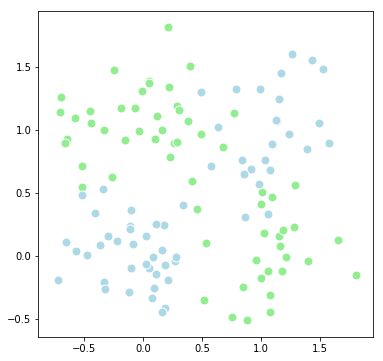

In [10]:
#Exercise 7.1
variance = 0.1
numSamples = 60
totSamples = 120
sd = np.sqrt(variance)

def N(mean):
    data = np.random.normal(loc = mean, scale = sd, size = [numSamples,2])
    return data

def sample(left,right):
    choice = np.random.choice([0,1],numSamples)
    return np.where(choice, left.T, right.T).T

data_1 = sample(N([0,1]), N([1,0]))
data_2 = sample(N([0,0]), N([1,1]))
set_1 = np.concatenate([data_1.T, np.ones((60, 1)).T]).T
set_2 = np.concatenate([data_2.T, -np.ones((60, 1)).T]).T

data = np.concatenate([set_1, set_2])
#_=scatter_1(data, c=data[:, 2], cmap='bwr', s=100, labels=['x1', 'x2'], title='Randomly generated training set')


plt.figure(figsize=(6,6))
scatter(data[data[:,2]==1, :], "lightgreen")
scatter(data[data[:,2]==-1, :], "lightblue")

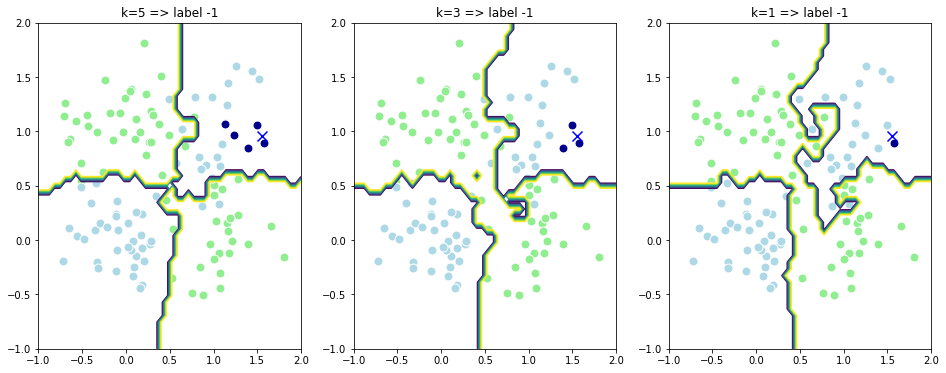

In [13]:
#Exercise 7.2
def calculateknn(k, x):
    # calc k nearest neighbors
    points = data[:,:2]
    by_distances = np.argsort(np.linalg.norm(points - x, axis=1))
    k_nearest = by_distances[:k]
    
    ones = np.sum((data[k_nearest,2]+1)/2)
    zeros = k - ones
    
    return 1 if ones > zeros else -1, data[k_nearest,:]

def calculateZ(k,n,points):
    Z = np.zeros(shape=(n,n)).reshape(n**2)
    for i in range(n**2):
        label, _ = calculateknn(k, points[i])
        Z[i] = label
    return Z.reshape((n,n))
    
def plot_contours(k):
    # plot contours
    n = 50
    x = np.linspace(-1, 2, n)
    X, Y = np.meshgrid(x, x)
    points = np.vstack([X.reshape(n**2), Y.reshape(n**2)]).T
    #print points.shape
    Z = calculateZ(k,n,points)
    plt.contour(X, Y, Z)
    return

def plot_knn(k, x, label=""):
    scatter(data[data[:,2]==1, :], "lightgreen")
    scatter(data[data[:,2]==-1, :], "lightblue")
    c, k_nearest_data = calculateknn(k, x)
    plt.title("k=%i => label %i"%(k, c))
    greens = k_nearest_data[k_nearest_data[:,2] == 1, :2]
    blues = k_nearest_data[k_nearest_data[:,2] == -1, :2]
    scatter(greens, "darkgreen", label)
    scatter(blues, "darkblue", label)
    plt.scatter(x[0], x[1], marker="x", s=100, c="green" if c == 1 else "blue")
    plot_contours(k)
    return

plt.figure(figsize=(16,6))
x = np.random.rand(2)*2
plt.subplot(1,3,1)
plot_knn(5, x)

plt.subplot(1,3,2)
plot_knn(3, x)

plt.subplot(1,3,3)
plot_knn(1, x)